In [112]:
import os
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import csv

In [113]:
key = 'enter your key'
ts = TimeSeries(key, output_format='pandas')

In [111]:
data, googl_meta_data = ts.get_daily('GOOGL', outputsize='full')
data = data.rename_axis(['Date'])
data

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2019-11-27,1315.42,1317.64,1309.47,1312.130,844080.0
2019-11-26,1309.91,1314.01,1304.04,1313.000,1097089.0
2019-11-25,1296.26,1310.41,1295.61,1305.640,1179658.0
2019-11-22,1303.00,1306.90,1289.36,1293.670,1388912.0
2019-11-21,1299.25,1311.12,1290.75,1300.140,1277338.0
...,...,...,...,...,...
2004-08-25,104.76,108.00,103.88,106.000,9188600.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0


In [114]:
data = data.rename(columns={'1. open': 'Open', '2. high':'High', '3. low':'Low', '4. close':'Close', '5. volume':'Volume'})

In [115]:
path = str(os.getcwd()) + "/" + "data"
data.to_csv("trainData.csv")

In [116]:
def read_train():
    prices = pd.read_csv("trainData.csv")
    prices = clean(prices)
    return prices

def clean(prices):
    (m, n) = prices.shape

    prices = prices.loc[:, ['Date', 'Open', 'Close']]

    # Add new column "Close Price at the Previous Day" and "Open Price at the Previous Day"
    prevColumn = prices.loc[:, ['Open', 'Close']].assign(index = lambda x: x.index-1)
    prevColumn = prevColumn.set_index('index')
    prices = prices.join(prevColumn, rsuffix='Prev')

    # Add new column "Close Price at the Day Before" and "Open Price at the Day Before"
    prevColumn = prices.loc[:, ['Open', 'Close']].assign(index = lambda x: x.index-2)
    prevColumn = prevColumn.set_index('index')
    prices = prices.join(prevColumn, rsuffix='Prev2')

    prevColumn = prices.loc[:, ['Open', 'Close']].assign(index = lambda x: x.index-3)
    prevColumn = prevColumn.set_index('index')
    prices = prices.join(prevColumn, rsuffix='Prev3')

    prevColumn = prices.loc[:, ['Open', 'Close']].assign(index = lambda x: x.index-4)
    prevColumn = prevColumn.set_index('index')
    prices = prices.join(prevColumn, rsuffix='Prev4')

    prevColumn = prices.loc[:, ['Open', 'Close']].assign(index = lambda x: x.index-5)
    prevColumn = prevColumn.set_index('index')
    prices = prices.join(prevColumn, rsuffix='Prev5')



    # No need now to save the fifth days data
    prices = prices[:m-5]

    return prices


def write_train(data):
    data.loc[:, ['Date','Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2','OpenPrev3','ClosePrev3',
                 'OpenPrev4','ClosePrev4','OpenPrev5','ClosePrev5']].to_csv("trainX.csv", index=False)
    data.loc[:, ['Close']].to_csv( "trainY.csv",index=False)
    
def write_test(data):
    print(year_Y_2017)
    year_2017=data.loc[mask]
    year_2017.loc[:, ['Date','Open','OpenPrev','ClosePrev','OpenPrev2','ClosePrev2','OpenPrev3','ClosePrev3',
                 'OpenPrev4','ClosePrev4','OpenPrev5','ClosePrev5']].to_csv("trainX.csv", index=False)
    year_2017.loc[:, ['Close']].to_csv( "trainY.csv",index=False)

In [117]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [118]:
def read_val():
    X = pd.read_csv("trainX.csv", header=0)
    y = pd.read_csv("trainY.csv", header=0)
    X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')
    return X, y



def plot_trend(x, predict, y, title):
    plt.xticks(rotation=45)
    plt.plot_date(x, y, fmt='b-', xdate=True, ydate=False, label='Real value')
    plt.plot_date(x, predict, fmt='r-', xdate=True, ydate=False, label='Predicted value')
    plt.legend(loc='upper center')
    plt.ylabel('Close prices')
    plt.title(title)
    plt.grid()
    plt.show()


def modify(X, columns):
    columns.append('Date2num')
    returnX = X.loc[:, columns]
    return returnX


def predict_and_plot(X, date):
    m, n = X.shape
    X_test = X.loc[np.floor(m*0.6)+1:]
    X_train = X.loc[:np.floor(m*0.6)]
    
    y_test = y.loc[np.floor(m*0.6)+1:]
    y_train = y.loc[:np.floor(m*0.6)]
    
    date_test = date.loc[np.floor(m*0.6)+1:]
    date_train = date.loc[:np.floor(m*0.6)]
    
    lr = LinearRegression()

    lr.fit(X_train, y_train)

    print('Coefficients: \n', lr.coef_)
    print('Intercept: \n', lr.intercept_)
    pred = lr.predict(X_test)
    
    return lr,pred

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
predictions = clf.predict(X_test)
predictions

array([[ 775.60612867],
       [ 503.62902022],
       [1012.46923817],
       [ 869.94681739],
       [ 198.69245246],
       [ 610.04418359],
       [ 572.18350589],
       [ 296.78924147],
       [ 446.49296573],
       [ 544.41283298],
       [ 524.79276218],
       [ 942.80296261],
       [ 455.85099939],
       [ 778.20557341],
       [ 359.36863878],
       [ 480.86330148],
       [ 475.81627898],
       [ 937.20717245],
       [ 588.30207276],
       [ 548.14939791],
       [ 754.14731079],
       [ 599.5292567 ],
       [ 668.59862817],
       [ 483.73980261],
       [ 490.60567474],
       [ 276.95245615],
       [ 500.84523493],
       [ 559.55414907],
       [1092.94092846],
       [ 458.4615387 ],
       [ 455.22929926],
       [1177.18129259],
       [ 518.33472901],
       [ 886.11878858],
       [ 461.78792089],
       [ 605.39799055],
       [ 887.90749022],
       [ 381.76487569],
       [1071.11360597],
       [ 413.04704512],
       [ 541.82702745],
       [ 646.981

In [122]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics

lr = LinearRegression()

model = lr.fit(X_train, y_train)
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:

scores = cross_val_score(model, X, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.97985781 0.99562545 0.99804019 0.98369644 0.99232299 0.99717969]


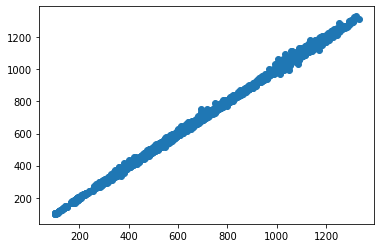

In [126]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [127]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.9989417633621933


In [60]:
prices_train=read_train()
write_train(prices_train)

X, y = read_val()

X['Date2num'] = X['Date'].apply(lambda x: mdates.date2num(x))
date = X.loc[:, ['Date']]
del X['Date']

X1 = modify(X, [])
predict_and_plot(X1,date)

Coefficients: 
 [[0.17890302]]
Intercept: 
 [-130806.56036494]


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 array([[516.30973584],
        [516.13083281],
        [515.95192979],
        ...,
        [118.78721697],
        [118.2505079 ],
        [118.07160487]]))

In [61]:
X3 = modify(X, ['Open','OpenPrev','ClosePrev'])
lr,close_val=predict_and_plot(X3, date)
X3

Coefficients: 
 [[ 1.00056689e+00  3.60349200e-02 -3.83311781e-02  5.08692577e-04]]
Intercept: 
 [-372.91832919]


,Open,OpenPrev,ClosePrev,Date2num
0,1315.42,1309.91,1313.00,737390.0
1,1309.91,1296.26,1305.64,737389.0
2,1296.26,1303.00,1293.67,737388.0
3,1303.00,1299.25,1300.14,737385.0
4,1299.25,1311.36,1301.86,737384.0
...,...,...,...,...
3837,102.70,102.32,102.37,731825.0
3838,102.32,105.28,102.01,731824.0
3839,105.28,108.10,106.15,731823.0
3840,108.10,104.95,107.91,731820.0


In [62]:
from collections import OrderedDict
from datetime import datetime

daterange = pd.date_range('1995-01-01', datetime.today().strftime('%Y-%m-%d'), freq='B')
newDate = pd.DataFrame(data=daterange, columns=['date'])
newDate = newDate.dropna()
newDate

,date
0,1995-01-02
1,1995-01-03
2,1995-01-04
3,1995-01-05
4,1995-01-06
...,...
6495,2019-11-25
6496,2019-11-26
6497,2019-11-27
6498,2019-11-28


In [63]:
prevOpen = data.loc[:,['Open']]
prevOpen = prevOpen.iloc[len(prevOpen)-1]
prevClose = close_val.item(len(close_val)-1)
prevOpen = prevOpen.values.item(0)
newX3 = X3
try:
    newX3.drop('Date2num',axis=1,inplace=True)
except:
    print('already dropped')
dummy = pd.DataFrame([[prevClose,prevOpen,prevClose]], columns=['Open','OpenPrev','ClosePrev'])
newX3 = newX3.append(dummy, ignore_index=True)
date = date.append(newDate, ignore_index=True)
for x in range(0,len(newDate)-1):
    print(len(newX3))
    print(len(date))
    lr,close_val = predict_and_plot(newX3, date)
    prevClose = close_val.item(len(close_val)-1)
    prevOpen = newX3.loc[:,['Open']]
    prevOpen = prevOpen.iloc[len(prevOpen)-1]
    prevOpen = prevOpen.values.item(0)
    dummy = pd.DataFrame([[prevClose,prevOpen,prevClose]], columns=['Open','OpenPrev','ClosePrev'])
    newX3 = newX3.append(dummy, ignore_index=True)

newX3

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


3843
10342
Coefficients: 
 [[ 1.00129254  0.03647881 -0.03792761]]
Intercept: 
 [0.05342866]
3844
10342
Coefficients: 
 [[ 1.0012888   0.03648428 -0.03792161]]
Intercept: 
 [0.04567715]
3845
10342
Coefficients: 
 [[ 1.00128891  0.03647492 -0.03791154]]
Intercept: 
 [0.04485977]
3846
10342
Coefficients: 
 [[ 1.00128891  0.03647492 -0.03791154]]
Intercept: 
 [0.04485977]
3847
10342
Coefficients: 
 [[ 1.00126071  0.03653303 -0.03792722]]
Intercept: 
 [0.03057102]
3848
10342
Coefficients: 
 [[ 1.00126071  0.03653303 -0.03792722]]
Intercept: 
 [0.03057102]
3849
10342
Coefficients: 
 [[ 1.00126254  0.03648358 -0.03788383]]
Intercept: 
 [0.03479792]
3850
10342
Coefficients: 
 [[ 1.00135054  0.03650017 -0.03800158]]
Intercept: 
 [0.04786904]
3851
10342
Coefficients: 
 [[ 1.00135054  0.03650017 -0.03800158]]
Intercept: 
 [0.04786904]
3852
10342
Coefficients: 
 [[ 1.00135581  0.03651665 -0.03802093]]
Intercept: 
 [0.04549778]
3853
10342
Coefficients: 
 [[ 1.00135581  0.03651665 -0.03802093]]
Int

Coefficients: 
 [[ 1.00159467  0.03605289 -0.03795154]]
Intercept: 
 [0.19660003]
3947
10342
Coefficients: 
 [[ 1.0015811   0.03592738 -0.03779774]]
Intercept: 
 [0.18247678]
3948
10342
Coefficients: 
 [[ 1.0015811   0.03592738 -0.03779774]]
Intercept: 
 [0.18247678]
3949
10342
Coefficients: 
 [[ 1.00158808  0.03566532 -0.03752594]]
Intercept: 
 [0.16639068]
3950
10342
Coefficients: 
 [[ 1.00159164  0.03526589 -0.0371029 ]]
Intercept: 
 [0.14012371]
3951
10342
Coefficients: 
 [[ 1.00159164  0.03526589 -0.0371029 ]]
Intercept: 
 [0.14012371]
3952
10342
Coefficients: 
 [[ 1.00178482  0.03527147 -0.03727799]]
Intercept: 
 [0.11706637]
3953
10342
Coefficients: 
 [[ 1.00178482  0.03527147 -0.03727799]]
Intercept: 
 [0.11706637]
3954
10342
Coefficients: 
 [[ 1.00178631  0.03525991 -0.03726621]]
Intercept: 
 [0.11541501]
3955
10342
Coefficients: 
 [[ 1.00177592  0.03517799 -0.03716264]]
Intercept: 
 [0.10442204]
3956
10342
Coefficients: 
 [[ 1.00177592  0.03517799 -0.03716264]]
Intercept: 
 [

4044
10342
Coefficients: 
 [[ 1.00295879  0.0367232  -0.03967075]]
Intercept: 
 [-0.11530531]
4045
10342
Coefficients: 
 [[ 1.0029601   0.03675434 -0.03970056]]
Intercept: 
 [-0.11803832]
4046
10342
Coefficients: 
 [[ 1.0029601   0.03675434 -0.03970056]]
Intercept: 
 [-0.11803832]
4047
10342
Coefficients: 
 [[ 1.00295148  0.03681393 -0.0397586 ]]
Intercept: 
 [-0.11069074]
4048
10342
Coefficients: 
 [[ 1.00295148  0.03681393 -0.0397586 ]]
Intercept: 
 [-0.11069074]
4049
10342
Coefficients: 
 [[ 1.00296513  0.03680182 -0.03975389]]
Intercept: 
 [-0.11720815]
4050
10342
Coefficients: 
 [[ 1.00297085  0.03680483 -0.03976073]]
Intercept: 
 [-0.11917823]
4051
10342
Coefficients: 
 [[ 1.00297085  0.03680483 -0.03976073]]
Intercept: 
 [-0.11917823]
4052
10342
Coefficients: 
 [[ 1.0029712   0.03680593 -0.03976239]]
Intercept: 
 [-0.11896877]
4053
10342
Coefficients: 
 [[ 1.0029712   0.03680593 -0.03976239]]
Intercept: 
 [-0.11896877]
4054
10342
Coefficients: 
 [[ 1.0029539   0.03683224 -0.0397

4133
10342
Coefficients: 
 [[ 1.00277481  0.0365131  -0.03929083]]
Intercept: 
 [-0.10146306]
4134
10342
Coefficients: 
 [[ 1.00337036  0.03652559 -0.0398762 ]]
Intercept: 
 [-0.12547736]
4135
10342
Coefficients: 
 [[ 1.00336747  0.036513   -0.03985989]]
Intercept: 
 [-0.12635856]
4136
10342
Coefficients: 
 [[ 1.00336747  0.036513   -0.03985989]]
Intercept: 
 [-0.12635856]
4137
10342
Coefficients: 
 [[ 1.00339595  0.03666371 -0.0400311 ]]
Intercept: 
 [-0.13483525]
4138
10342
Coefficients: 
 [[ 1.00339595  0.03666371 -0.0400311 ]]
Intercept: 
 [-0.13483525]
4139
10342
Coefficients: 
 [[ 1.00340837  0.03694715 -0.04033536]]
Intercept: 
 [-0.12585835]
4140
10342
Coefficients: 
 [[ 1.00338744  0.03726097 -0.04061138]]
Intercept: 
 [-0.14380392]
4141
10342
Coefficients: 
 [[ 1.00338744  0.03726097 -0.04061138]]
Intercept: 
 [-0.14380392]
4142
10342
Coefficients: 
 [[ 1.0033291   0.03694751 -0.04024973]]
Intercept: 
 [-0.13308857]
4143
10342
Coefficients: 
 [[ 1.0033291   0.03694751 -0.0402

4229
10342
Coefficients: 
 [[ 1.00267403  0.0364255  -0.03911086]]
Intercept: 
 [-0.09679954]
4230
10342
Coefficients: 
 [[ 1.00269307  0.03635395 -0.03904563]]
Intercept: 
 [-0.10981482]
4231
10342
Coefficients: 
 [[ 1.00269307  0.03635395 -0.03904563]]
Intercept: 
 [-0.10981482]
4232
10342
Coefficients: 
 [[ 1.00271564  0.0363424  -0.03905231]]
Intercept: 
 [-0.11427568]
4233
10342
Coefficients: 
 [[ 1.00271564  0.0363424  -0.03905231]]
Intercept: 
 [-0.11427568]
4234
10342
Coefficients: 
 [[ 1.00271147  0.03633531 -0.03903861]]
Intercept: 
 [-0.11678921]
4235
10342
Coefficients: 
 [[ 1.00271072  0.03636107 -0.03906143]]
Intercept: 
 [-0.11902776]
4236
10342
Coefficients: 
 [[ 1.00271072  0.03636107 -0.03906143]]
Intercept: 
 [-0.11902776]
4237
10342
Coefficients: 
 [[ 1.00269306  0.03632993 -0.0390198 ]]
Intercept: 
 [-0.11169593]
4238
10342
Coefficients: 
 [[ 1.00269306  0.03632993 -0.0390198 ]]
Intercept: 
 [-0.11169593]
4239
10342
Coefficients: 
 [[ 1.0026857   0.03632661 -0.0390

4342
10342
Coefficients: 
 [[ 1.00281126  0.03546402 -0.03837446]]
Intercept: 
 [-0.01330333]
4343
10342
Coefficients: 
 [[ 1.00281126  0.03546402 -0.03837446]]
Intercept: 
 [-0.01330333]
4344
10342
Coefficients: 
 [[ 1.00281082  0.03545389 -0.03838459]]
Intercept: 
 [0.00620548]
4345
10342
Coefficients: 
 [[ 1.0028115   0.03544996 -0.03838046]]
Intercept: 
 [0.00537499]
4346
10342
Coefficients: 
 [[ 1.0028115   0.03544996 -0.03838046]]
Intercept: 
 [0.00537499]
4347
10342
Coefficients: 
 [[ 1.00281312  0.03546117 -0.03838624]]
Intercept: 
 [-0.00127456]
4348
10342
Coefficients: 
 [[ 1.00281312  0.03546117 -0.03838624]]
Intercept: 
 [-0.00127456]
4349
10342
Coefficients: 
 [[ 1.00281243  0.03546342 -0.03838837]]
Intercept: 
 [-0.00073708]
4350
10342
Coefficients: 
 [[ 1.00286915  0.03553341 -0.03850932]]
Intercept: 
 [-0.00621252]
4351
10342
Coefficients: 
 [[ 1.00286915  0.03553341 -0.03850932]]
Intercept: 
 [-0.00621252]
4352
10342
Coefficients: 
 [[ 1.00283313  0.03528756 -0.0382422

4433
10342
Coefficients: 
 [[ 1.00300548  0.03397592 -0.03714385]]
Intercept: 
 [0.04551001]
4434
10342
Coefficients: 
 [[ 1.00298673  0.03402455 -0.03716606]]
Intercept: 
 [0.03837507]
4435
10342
Coefficients: 
 [[ 1.00296566  0.03396484 -0.03709294]]
Intercept: 
 [0.04550502]
4436
10342
Coefficients: 
 [[ 1.00296566  0.03396484 -0.03709294]]
Intercept: 
 [0.04550502]
4437
10342
Coefficients: 
 [[ 1.00299386  0.03397794 -0.03714335]]
Intercept: 
 [0.05395029]
4438
10342
Coefficients: 
 [[ 1.00299386  0.03397794 -0.03714335]]
Intercept: 
 [0.05395029]
4439
10342
Coefficients: 
 [[ 1.00299942  0.03398243 -0.0371502 ]]
Intercept: 
 [0.05098512]
4440
10342
Coefficients: 
 [[ 1.0030021   0.03397214 -0.03714358]]
Intercept: 
 [0.05189405]
4441
10342
Coefficients: 
 [[ 1.0030021   0.03397214 -0.03714358]]
Intercept: 
 [0.05189405]
4442
10342
Coefficients: 
 [[ 1.00301647  0.03395996 -0.03715944]]
Intercept: 
 [0.06452873]
4443
10342
Coefficients: 
 [[ 1.00301647  0.03395996 -0.03715944]]
Int

Coefficients: 
 [[ 1.00315608  0.03703503 -0.04047041]]
Intercept: 
 [0.15239337]
4530
10342
Coefficients: 
 [[ 1.00315666  0.03692582 -0.04035801]]
Intercept: 
 [0.14892602]
4531
10342
Coefficients: 
 [[ 1.00315666  0.03692582 -0.04035801]]
Intercept: 
 [0.14892602]
4532
10342
Coefficients: 
 [[ 1.00332057  0.03751812 -0.04107501]]
Intercept: 
 [0.11277996]
4533
10342
Coefficients: 
 [[ 1.00332057  0.03751812 -0.04107501]]
Intercept: 
 [0.11277996]
4534
10342
Coefficients: 
 [[ 1.00328883  0.03696936 -0.04051523]]
Intercept: 
 [0.13177431]
4535
10342
Coefficients: 
 [[ 1.00333656  0.03608624 -0.03971836]]
Intercept: 
 [0.16685423]
4536
10342
Coefficients: 
 [[ 1.00333656  0.03608624 -0.03971836]]
Intercept: 
 [0.16685423]
4537
10342
Coefficients: 
 [[ 1.00323435  0.03590461 -0.03946845]]
Intercept: 
 [0.19771578]
4538
10342
Coefficients: 
 [[ 1.00323435  0.03590461 -0.03946845]]
Intercept: 
 [0.19771578]
4539
10342
Coefficients: 
 [[ 1.00322831  0.03592183 -0.03948607]]
Intercept: 
 [

4626
10342
Coefficients: 
 [[ 1.00388415  0.0333081  -0.03759695]]
Intercept: 
 [0.26397185]
4627
10342
Coefficients: 
 [[ 1.00393216  0.0333917  -0.03772149]]
Intercept: 
 [0.25761843]
4628
10342
Coefficients: 
 [[ 1.00393216  0.0333917  -0.03772149]]
Intercept: 
 [0.25761843]
4629
10342
Coefficients: 
 [[ 1.00377267  0.03275916 -0.0369485 ]]
Intercept: 
 [0.27472578]
4630
10342
Coefficients: 
 [[ 1.00377239  0.03362565 -0.03786546]]
Intercept: 
 [0.32012483]
4631
10342
Coefficients: 
 [[ 1.00377239  0.03362565 -0.03786546]]
Intercept: 
 [0.32012483]
4632
10342
Coefficients: 
 [[ 1.00401894  0.03377678 -0.03823512]]
Intercept: 
 [0.29489384]
4633
10342
Coefficients: 
 [[ 1.00401894  0.03377678 -0.03823512]]
Intercept: 
 [0.29489384]
4634
10342
Coefficients: 
 [[ 1.00396468  0.03386082 -0.03827062]]
Intercept: 
 [0.30006234]
4635
10342
Coefficients: 
 [[ 1.00404517  0.03380182 -0.03826974]]
Intercept: 
 [0.27977224]
4636
10342
Coefficients: 
 [[ 1.00404517  0.03380182 -0.03826974]]
Int

Coefficients: 
 [[ 1.00248924  0.03871173 -0.04132704]]
Intercept: 
 [-0.00483207]
4722
10342
Coefficients: 
 [[ 1.00250004  0.03852202 -0.04114031]]
Intercept: 
 [-0.01258494]
4723
10342
Coefficients: 
 [[ 1.00250004  0.03852202 -0.04114031]]
Intercept: 
 [-0.01258494]
4724
10342
Coefficients: 
 [[ 1.00250371  0.03842371 -0.04103244]]
Intercept: 
 [-0.02577026]
4725
10342
Coefficients: 
 [[ 1.00253686  0.03841854 -0.04105617]]
Intercept: 
 [-0.03003699]
4726
10342
Coefficients: 
 [[ 1.00253686  0.03841854 -0.04105617]]
Intercept: 
 [-0.03003699]
4727
10342
Coefficients: 
 [[ 1.00253062  0.03842958 -0.04105997]]
Intercept: 
 [-0.03103017]
4728
10342
Coefficients: 
 [[ 1.00253062  0.03842958 -0.04105997]]
Intercept: 
 [-0.03103017]
4729
10342
Coefficients: 
 [[ 1.00251265  0.03855059 -0.04116756]]
Intercept: 
 [-0.02645219]
4730
10342
Coefficients: 
 [[ 1.00244084  0.03856763 -0.04109951]]
Intercept: 
 [-0.03975704]
4731
10342
Coefficients: 
 [[ 1.00244084  0.03856763 -0.04109951]]
Inte

Coefficients: 
 [[ 1.00390679  0.04000564 -0.04398934]]
Intercept: 
 [-0.05814781]
4829
10342
Coefficients: 
 [[ 1.0039199   0.03993918 -0.04393704]]
Intercept: 
 [-0.05701193]
4830
10342
Coefficients: 
 [[ 1.00388862  0.0400631  -0.04404705]]
Intercept: 
 [-0.03836212]
4831
10342
Coefficients: 
 [[ 1.00388862  0.0400631  -0.04404705]]
Intercept: 
 [-0.03836212]
4832
10342
Coefficients: 
 [[ 1.00390336  0.04004704 -0.04404339]]
Intercept: 
 [-0.04088179]
4833
10342
Coefficients: 
 [[ 1.00390336  0.04004704 -0.04404339]]
Intercept: 
 [-0.04088179]
4834
10342
Coefficients: 
 [[ 1.00389167  0.03970493 -0.04368674]]
Intercept: 
 [-0.04407758]
4835
10342
Coefficients: 
 [[ 1.0039753   0.04016148 -0.04420231]]
Intercept: 
 [-0.071931]
4836
10342
Coefficients: 
 [[ 1.0039753   0.04016148 -0.04420231]]
Intercept: 
 [-0.071931]
4837
10342
Coefficients: 
 [[ 1.00394625  0.04017186 -0.0441872 ]]
Intercept: 
 [-0.06788302]
4838
10342
Coefficients: 
 [[ 1.00394625  0.04017186 -0.0441872 ]]
Intercep

4935
10342
Coefficients: 
 [[ 1.0051109   0.0417579  -0.04696075]]
Intercept: 
 [-0.0518017]
4936
10342
Coefficients: 
 [[ 1.0051109   0.0417579  -0.04696075]]
Intercept: 
 [-0.0518017]
4937
10342
Coefficients: 
 [[ 1.00521451  0.04220403 -0.04748695]]
Intercept: 
 [-0.07572305]
4938
10342
Coefficients: 
 [[ 1.00521451  0.04220403 -0.04748695]]
Intercept: 
 [-0.07572305]
4939
10342
Coefficients: 
 [[ 1.00520047  0.04239966 -0.04767492]]
Intercept: 
 [-0.0692016]
4940
10342
Coefficients: 
 [[ 1.00513908  0.04261325 -0.04781546]]
Intercept: 
 [-0.08106507]
4941
10342
Coefficients: 
 [[ 1.00513908  0.04261325 -0.04781546]]
Intercept: 
 [-0.08106507]
4942
10342
Coefficients: 
 [[ 1.00508745  0.04304681 -0.04820225]]
Intercept: 
 [-0.0759963]
4943
10342
Coefficients: 
 [[ 1.00508745  0.04304681 -0.04820225]]
Intercept: 
 [-0.0759963]
4944
10342
Coefficients: 
 [[ 1.00484031  0.04320917 -0.04808969]]
Intercept: 
 [-0.10510553]
4945
10342
Coefficients: 
 [[ 1.00482924  0.04323491 -0.04810563]

Coefficients: 
 [[ 1.00268868  0.04356649 -0.0462683 ]]
Intercept: 
 [-0.16241557]
5042
10342
Coefficients: 
 [[ 1.00249529  0.04278007 -0.04529757]]
Intercept: 
 [-0.14977645]
5043
10342
Coefficients: 
 [[ 1.00249529  0.04278007 -0.04529757]]
Intercept: 
 [-0.14977645]
5044
10342
Coefficients: 
 [[ 1.00274495  0.04293463 -0.04570812]]
Intercept: 
 [-0.1412723]
5045
10342
Coefficients: 
 [[ 1.00277798  0.04293492 -0.04573952]]
Intercept: 
 [-0.14387493]
5046
10342
Coefficients: 
 [[ 1.00277798  0.04293492 -0.04573952]]
Intercept: 
 [-0.14387493]
5047
10342
Coefficients: 
 [[ 1.00277362  0.04291779 -0.04571776]]
Intercept: 
 [-0.14424765]
5048
10342
Coefficients: 
 [[ 1.00277362  0.04291779 -0.04571776]]
Intercept: 
 [-0.14424765]
5049
10342
Coefficients: 
 [[ 1.002837    0.04177214 -0.04463212]]
Intercept: 
 [-0.14989521]
5050
10342
Coefficients: 
 [[ 1.00208335  0.04347209 -0.04556504]]
Intercept: 
 [-0.16989033]
5051
10342
Coefficients: 
 [[ 1.00208335  0.04347209 -0.04556504]]
Inter

Coefficients: 
 [[ 1.00305321  0.03966957 -0.04282375]]
Intercept: 
 [-0.08102033]
5150
10342
Coefficients: 
 [[ 1.00305991  0.03978023 -0.04295011]]
Intercept: 
 [-0.07198956]
5151
10342
Coefficients: 
 [[ 1.00305991  0.03978023 -0.04295011]]
Intercept: 
 [-0.07198956]
5152
10342
Coefficients: 
 [[ 1.00304549  0.03984468 -0.04299499]]
Intercept: 
 [-0.07713763]
5153
10342
Coefficients: 
 [[ 1.00304549  0.03984468 -0.04299499]]
Intercept: 
 [-0.07713763]
5154
10342
Coefficients: 
 [[ 1.00307742  0.03984593 -0.04303297]]
Intercept: 
 [-0.07237083]
5155
10342
Coefficients: 
 [[ 1.00308726  0.03981446 -0.04301039]]
Intercept: 
 [-0.07332413]
5156
10342
Coefficients: 
 [[ 1.00308726  0.03981446 -0.04301039]]
Intercept: 
 [-0.07332413]
5157
10342
Coefficients: 
 [[ 1.00309008  0.03953983 -0.04272568]]
Intercept: 
 [-0.08648013]
5158
10342
Coefficients: 
 [[ 1.00309008  0.03953983 -0.04272568]]
Intercept: 
 [-0.08648013]
5159
10342
Coefficients: 
 [[ 1.00309522  0.03944868 -0.04263188]]
Inte

Coefficients: 
 [[ 1.00219626  0.03961427 -0.04194744]]
Intercept: 
 [-0.04512191]
5260
10342
Coefficients: 
 [[ 1.00219835  0.03965212 -0.04198608]]
Intercept: 
 [-0.04637807]
5261
10342
Coefficients: 
 [[ 1.00219835  0.03965212 -0.04198608]]
Intercept: 
 [-0.04637807]
5262
10342
Coefficients: 
 [[ 1.00227029  0.03978338 -0.04220338]]
Intercept: 
 [-0.03282817]
5263
10342
Coefficients: 
 [[ 1.00227029  0.03978338 -0.04220338]]
Intercept: 
 [-0.03282817]
5264
10342
Coefficients: 
 [[ 1.00227391  0.03973784 -0.04215615]]
Intercept: 
 [-0.0379539]
5265
10342
Coefficients: 
 [[ 1.00228806  0.03980243 -0.04223033]]
Intercept: 
 [-0.04235672]
5266
10342
Coefficients: 
 [[ 1.00228806  0.03980243 -0.04223033]]
Intercept: 
 [-0.04235672]
5267
10342
Coefficients: 
 [[ 1.00228587  0.03988855 -0.04232057]]
Intercept: 
 [-0.03626018]
5268
10342
Coefficients: 
 [[ 1.00228587  0.03988855 -0.04232057]]
Intercept: 
 [-0.03626018]
5269
10342
Coefficients: 
 [[ 1.00231788  0.03995613 -0.04241311]]
Inter

Coefficients: 
 [[ 1.00212199  0.0396298  -0.04189857]]
Intercept: 
 [-0.03681419]
5370
10342
Coefficients: 
 [[ 1.00213109  0.03954295 -0.04181749]]
Intercept: 
 [-0.04003782]
5371
10342
Coefficients: 
 [[ 1.00213109  0.03954295 -0.04181749]]
Intercept: 
 [-0.04003782]
5372
10342
Coefficients: 
 [[ 1.00213331  0.03965761 -0.04192243]]
Intercept: 
 [-0.05163882]
5373
10342
Coefficients: 
 [[ 1.00213331  0.03965761 -0.04192243]]
Intercept: 
 [-0.05163882]
5374
10342
Coefficients: 
 [[ 1.00211813  0.03969199 -0.04194527]]
Intercept: 
 [-0.04810095]
5375
10342
Coefficients: 
 [[ 1.00210663  0.03973964 -0.04197697]]
Intercept: 
 [-0.0524224]
5376
10342
Coefficients: 
 [[ 1.00210663  0.03973964 -0.04197697]]
Intercept: 
 [-0.0524224]
5377
10342
Coefficients: 
 [[ 1.00210961  0.03984638 -0.04209041]]
Intercept: 
 [-0.04879268]
5378
10342
Coefficients: 
 [[ 1.00210961  0.03984638 -0.04209041]]
Intercept: 
 [-0.04879268]
5379
10342
Coefficients: 
 [[ 1.00220558  0.03982434 -0.04215214]]
Interc

5467
10342
Coefficients: 
 [[ 1.00211705  0.04213788 -0.04430801]]
Intercept: 
 [-0.13038453]
5468
10342
Coefficients: 
 [[ 1.00211705  0.04213788 -0.04430801]]
Intercept: 
 [-0.13038453]
5469
10342
Coefficients: 
 [[ 1.0020964   0.04193146 -0.04409158]]
Intercept: 
 [-0.11995261]
5470
10342
Coefficients: 
 [[ 1.00210489  0.04192643 -0.04410246]]
Intercept: 
 [-0.11271721]
5471
10342
Coefficients: 
 [[ 1.00210489  0.04192643 -0.04410246]]
Intercept: 
 [-0.11271721]
5472
10342
Coefficients: 
 [[ 1.00210461  0.0419235  -0.04409896]]
Intercept: 
 [-0.1130012]
5473
10342
Coefficients: 
 [[ 1.00210461  0.0419235  -0.04409896]]
Intercept: 
 [-0.1130012]
5474
10342
Coefficients: 
 [[ 1.0020995   0.04198604 -0.04415216]]
Intercept: 
 [-0.11711926]
5475
10342
Coefficients: 
 [[ 1.00207334  0.04204813 -0.04419352]]
Intercept: 
 [-0.11181357]
5476
10342
Coefficients: 
 [[ 1.00207334  0.04204813 -0.04419352]]
Intercept: 
 [-0.11181357]
5477
10342
Coefficients: 
 [[ 1.00207948  0.04210012 -0.044246

Coefficients: 
 [[ 1.0023417   0.04192476 -0.04438588]]
Intercept: 
 [-0.06912557]
5573
10342
Coefficients: 
 [[ 1.0023417   0.04192476 -0.04438588]]
Intercept: 
 [-0.06912557]
5574
10342
Coefficients: 
 [[ 1.00235626  0.04180691 -0.04428996]]
Intercept: 
 [-0.06247452]
5575
10342
Coefficients: 
 [[ 1.00241029  0.04184398 -0.04439207]]
Intercept: 
 [-0.05260848]
5576
10342
Coefficients: 
 [[ 1.00241029  0.04184398 -0.04439207]]
Intercept: 
 [-0.05260848]
5577
10342
Coefficients: 
 [[ 1.00240013  0.04180724 -0.04434166]]
Intercept: 
 [-0.05575333]
5578
10342
Coefficients: 
 [[ 1.00240013  0.04180724 -0.04434166]]
Intercept: 
 [-0.05575333]
5579
10342
Coefficients: 
 [[ 1.00241216  0.04182328 -0.04436134]]
Intercept: 
 [-0.06331702]
5580
10342
Coefficients: 
 [[ 1.00241071  0.04182678 -0.04436369]]
Intercept: 
 [-0.0630443]
5581
10342
Coefficients: 
 [[ 1.00241071  0.04182678 -0.04436369]]
Intercept: 
 [-0.0630443]
5582
10342
Coefficients: 
 [[ 1.00239854  0.04180099 -0.04431669]]
Interc

Coefficients: 
 [[ 1.00202802  0.04356716 -0.04568716]]
Intercept: 
 [-0.0946513]
5684
10342
Coefficients: 
 [[ 1.00210617  0.04302965 -0.04521386]]
Intercept: 
 [-0.10735692]
5685
10342
Coefficients: 
 [[ 1.00211288  0.04275949 -0.04492787]]
Intercept: 
 [-0.12807498]
5686
10342
Coefficients: 
 [[ 1.00211288  0.04275949 -0.04492787]]
Intercept: 
 [-0.12807498]
5687
10342
Coefficients: 
 [[ 1.00212718  0.0429746  -0.04515072]]
Intercept: 
 [-0.13409237]
5688
10342
Coefficients: 
 [[ 1.00212718  0.0429746  -0.04515072]]
Intercept: 
 [-0.13409237]
5689
10342
Coefficients: 
 [[ 1.00213134  0.04296526 -0.04516437]]
Intercept: 
 [-0.11693315]
5690
10342
Coefficients: 
 [[ 1.00213127  0.04296216 -0.04516072]]
Intercept: 
 [-0.11735754]
5691
10342
Coefficients: 
 [[ 1.00213127  0.04296216 -0.04516072]]
Intercept: 
 [-0.11735754]
5692
10342
Coefficients: 
 [[ 1.00211798  0.04296468 -0.04514546]]
Intercept: 
 [-0.12145217]
5693
10342
Coefficients: 
 [[ 1.00211798  0.04296468 -0.04514546]]
Inter

5793
10342
Coefficients: 
 [[ 1.00087249  0.04343192 -0.04429491]]
Intercept: 
 [-0.18908223]
5794
10342
Coefficients: 
 [[ 1.00095581  0.04345591 -0.04438109]]
Intercept: 
 [-0.20823283]
5795
10342
Coefficients: 
 [[ 1.00095274  0.04343673 -0.04435818]]
Intercept: 
 [-0.20883081]
5796
10342
Coefficients: 
 [[ 1.00095274  0.04343673 -0.04435818]]
Intercept: 
 [-0.20883081]
5797
10342
Coefficients: 
 [[ 1.00102395  0.0431344  -0.04411074]]
Intercept: 
 [-0.22379718]
5798
10342
Coefficients: 
 [[ 1.00102395  0.0431344  -0.04411074]]
Intercept: 
 [-0.22379718]
5799
10342
Coefficients: 
 [[ 1.00100834  0.04343509 -0.04438597]]
Intercept: 
 [-0.23279079]
5800
10342
Coefficients: 
 [[ 0.99994483  0.04330779 -0.04321097]]
Intercept: 
 [-0.21772717]
5801
10342
Coefficients: 
 [[ 0.99994483  0.04330779 -0.04321097]]
Intercept: 
 [-0.21772717]
5802
10342
Coefficients: 
 [[ 0.99995794  0.04332234 -0.04324112]]
Intercept: 
 [-0.21539516]
5803
10342
Coefficients: 
 [[ 0.99995794  0.04332234 -0.0432

Coefficients: 
 [[ 1.0001234   0.04284752 -0.04289229]]
Intercept: 
 [-0.25487739]
5904
10342
Coefficients: 
 [[ 1.00010087  0.04250539 -0.04253966]]
Intercept: 
 [-0.24412402]
5905
10342
Coefficients: 
 [[ 1.00012883  0.04236323 -0.04244346]]
Intercept: 
 [-0.22815232]
5906
10342
Coefficients: 
 [[ 1.00012883  0.04236323 -0.04244346]]
Intercept: 
 [-0.22815232]
5907
10342
Coefficients: 
 [[ 1.00013718  0.04239188 -0.04248478]]
Intercept: 
 [-0.22431849]
5908
10342
Coefficients: 
 [[ 1.00013718  0.04239188 -0.04248478]]
Intercept: 
 [-0.22431849]
5909
10342
Coefficients: 
 [[ 1.00013658  0.04248708 -0.04257494]]
Intercept: 
 [-0.22824977]
5910
10342
Coefficients: 
 [[ 1.00010802  0.04243158 -0.04250514]]
Intercept: 
 [-0.21566871]
5911
10342
Coefficients: 
 [[ 1.00010802  0.04243158 -0.04250514]]
Intercept: 
 [-0.21566871]
5912
10342
Coefficients: 
 [[ 1.00009611  0.0424009  -0.04246493]]
Intercept: 
 [-0.21356554]
5913
10342
Coefficients: 
 [[ 1.00009611  0.0424009  -0.04246493]]
Inte

6012
10342
Coefficients: 
 [[ 0.99942764  0.04249396 -0.0419085 ]]
Intercept: 
 [-0.19753661]
6013
10342
Coefficients: 
 [[ 0.99942764  0.04249396 -0.0419085 ]]
Intercept: 
 [-0.19753661]
6014
10342
Coefficients: 
 [[ 0.99944674  0.042451   -0.04187756]]
Intercept: 
 [-0.20360984]
6015
10342
Coefficients: 
 [[ 0.99945125  0.04244943 -0.04187477]]
Intercept: 
 [-0.20853549]
6016
10342
Coefficients: 
 [[ 0.99945125  0.04244943 -0.04187477]]
Intercept: 
 [-0.20853549]
6017
10342
Coefficients: 
 [[ 0.99945047  0.04245265 -0.0418763 ]]
Intercept: 
 [-0.2093211]
6018
10342
Coefficients: 
 [[ 0.99945047  0.04245265 -0.0418763 ]]
Intercept: 
 [-0.2093211]
6019
10342
Coefficients: 
 [[ 0.99944721  0.04247198 -0.04189397]]
Intercept: 
 [-0.20794042]
6020
10342
Coefficients: 
 [[ 0.9994582   0.0424014  -0.04182408]]
Intercept: 
 [-0.21681148]
6021
10342
Coefficients: 
 [[ 0.9994582   0.0424014  -0.04182408]]
Intercept: 
 [-0.21681148]
6022
10342
Coefficients: 
 [[ 0.99952143  0.04240941 -0.041889

Coefficients: 
 [[ 0.99931993  0.04204929 -0.04144706]]
Intercept: 
 [-0.12159728]
6122
10342
Coefficients: 
 [[ 0.99931358  0.04205404 -0.04144888]]
Intercept: 
 [-0.11876001]
6123
10342
Coefficients: 
 [[ 0.99931358  0.04205404 -0.04144888]]
Intercept: 
 [-0.11876001]
6124
10342
Coefficients: 
 [[ 0.99932312  0.0420771  -0.04147946]]
Intercept: 
 [-0.12043945]
6125
10342
Coefficients: 
 [[ 0.99933585  0.04219414 -0.0416193 ]]
Intercept: 
 [-0.1121085]
6126
10342
Coefficients: 
 [[ 0.99933585  0.04219414 -0.0416193 ]]
Intercept: 
 [-0.1121085]
6127
10342
Coefficients: 
 [[ 0.99910785  0.04230071 -0.04148528]]
Intercept: 
 [-0.12242099]
6128
10342
Coefficients: 
 [[ 0.99910785  0.04230071 -0.04148528]]
Intercept: 
 [-0.12242099]
6129
10342
Coefficients: 
 [[ 0.99911925  0.0422979  -0.04150234]]
Intercept: 
 [-0.11546046]
6130
10342
Coefficients: 
 [[ 0.99911619  0.04230014 -0.04150103]]
Intercept: 
 [-0.1158613]
6131
10342
Coefficients: 
 [[ 0.99911619  0.04230014 -0.04150103]]
Interce

Coefficients: 
 [[ 0.99854095  0.04233892 -0.04093932]]
Intercept: 
 [-0.13654805]
6220
10342
Coefficients: 
 [[ 0.99855108  0.04235828 -0.04096474]]
Intercept: 
 [-0.13989661]
6221
10342
Coefficients: 
 [[ 0.99855108  0.04235828 -0.04096474]]
Intercept: 
 [-0.13989661]
6222
10342
Coefficients: 
 [[ 0.99856073  0.0423524  -0.04097231]]
Intercept: 
 [-0.13679175]
6223
10342
Coefficients: 
 [[ 0.99856073  0.0423524  -0.04097231]]
Intercept: 
 [-0.13679175]
6224
10342
Coefficients: 
 [[ 0.99856142  0.04235242 -0.04097361]]
Intercept: 
 [-0.13629791]
6225
10342
Coefficients: 
 [[ 0.99856179  0.04235628 -0.04097764]]
Intercept: 
 [-0.13646626]
6226
10342
Coefficients: 
 [[ 0.99856179  0.04235628 -0.04097764]]
Intercept: 
 [-0.13646626]
6227
10342
Coefficients: 
 [[ 0.99858575  0.04249913 -0.04116264]]
Intercept: 
 [-0.1216246]
6228
10342
Coefficients: 
 [[ 0.99858575  0.04249913 -0.04116264]]
Intercept: 
 [-0.1216246]
6229
10342
Coefficients: 
 [[ 0.99857932  0.04237331 -0.04102082]]
Interc

6319
10342
Coefficients: 
 [[ 0.99874075  0.04285574 -0.04165338]]
Intercept: 
 [-0.13904108]
6320
10342
Coefficients: 
 [[ 0.99877161  0.04278596 -0.04160827]]
Intercept: 
 [-0.14412534]
6321
10342
Coefficients: 
 [[ 0.99877161  0.04278596 -0.04160827]]
Intercept: 
 [-0.14412534]
6322
10342
Coefficients: 
 [[ 0.99874022  0.04271717 -0.04149726]]
Intercept: 
 [-0.15302299]
6323
10342
Coefficients: 
 [[ 0.99874022  0.04271717 -0.04149726]]
Intercept: 
 [-0.15302299]
6324
10342
Coefficients: 
 [[ 0.99872825  0.0427541  -0.04151619]]
Intercept: 
 [-0.15796831]
6325
10342
Coefficients: 
 [[ 0.99873776  0.0428121  -0.0415876 ]]
Intercept: 
 [-0.15478011]
6326
10342
Coefficients: 
 [[ 0.99873776  0.0428121  -0.0415876 ]]
Intercept: 
 [-0.15478011]
6327
10342
Coefficients: 
 [[ 0.99866923  0.04299615 -0.04168996]]
Intercept: 
 [-0.16556442]
6328
10342
Coefficients: 
 [[ 0.99866923  0.04299615 -0.04168996]]
Intercept: 
 [-0.16556442]
6329
10342
Coefficients: 
 [[ 0.99866395  0.04290235 -0.0416

ValueError: Found input variables with inconsistent numbers of samples: [3843, 3842]

In [ ]:
date